## **Importing libraries for use**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle as pkl
import joblib as jb
from sklearn.impute import IterativeImputer

In [273]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_predict

## **Reading from the CSV files**

In [338]:
male_legacy = pd.read_csv("male_players (legacy).csv", low_memory=False)

In [276]:
male_legacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


## **1. Data Cleaning for both the Male legacy and FIFA 22 dataset**

In [277]:
for i in male_legacy.columns:
    if 'url' in i:
        male_legacy.drop(i,axis=1, inplace = True)

**Dropping columns with 30% or more null values**

In [278]:
# Dropping columns with 30% or more null values
male_legacy.dropna(thresh= 0.3 * len(players_21), axis=1, inplace=True)

male_legacy.head()

,player_id,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,20801,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,9014,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,41236,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,167495,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3


**Removing unncessary columns**

In [279]:
remove_columns = ['player_positions', 'player_id', 'fifa_version', 'fifa_update_date', 'short_name', 'long_name','club_team_id', 'club_name',
                  'league_name','age', 'dob', 'nationality_id', 'nationality_name' , 'real_face','club_position',
                  'club_jersey_number','ls', 'st', 'rs',
                   'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
                   'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
                   'rcb', 'rb', 'gk','player_traits', 'mentality_composure','release_clause_eur', 'club_joined_date' ]


male_legacy = male_legacy.drop(columns=remove_columns)

**Seperating the categorical and quantitative data**

In [280]:
alpha_df = male_legacy.select_dtypes(exclude='number')
numeric_df = male_legacy.select_dtypes(include='number')

## Working with the numeric data for Male Legacy

In [281]:
nan_count_columns = numeric_df.isna().sum()
nan_count_columns

fifa_update                           0
overall                               0
potential                             0
value_eur                          2053
wage_eur                           1761
height_cm                             0
weight_kg                             0
league_id                          1773
league_level                       2717
club_contract_valid_until_year     1773
weak_foot                             0
skill_moves                           0
international_reputation              0
pace                              17969
shooting                          17969
passing                           17969
dribbling                         17969
defending                         17969
physic                            17969
attacking_crossing                    0
attacking_finishing                   0
attacking_heading_accuracy            0
attacking_short_passing               0
attacking_volleys                     0
skill_dribbling                       0


**Imputing the numeric data**

In [282]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="median")
numeric_df = pd.DataFrame(impute.fit_transform(numeric_df), columns= numeric_df.columns)

#Taking out the iterative due to the low processing power of my machine
#imp = IterativeImputer(max_iter = 10, random_state = 0)
#numeric_df = pd.DataFrame(np.round(imp.fit_transform(numeric_df)), columns= numeric_df.columns)

In [283]:
nan_count_columns1 = numeric_df.isna().sum()
nan_count_columns1

fifa_update                       0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
height_cm                         0
weight_kg                         0
league_id                         0
league_level                      0
club_contract_valid_until_year    0
weak_foot                         0
skill_moves                       0
international_reputation          0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing          

## Working with the categorical data

In [284]:
nan_count_columns1 = alpha_df.isna().sum()
nan_count_columns1

preferred_foot    0
work_rate         0
body_type         0
dtype: int64

**Encoding the categoricals**

In [285]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original data
encoded_df = alpha_df.copy()

for col in alpha_df.columns:
    encoded_df[col] = label_encoder.fit_transform(alpha_df[col])

alpha_df=encoded_df
alpha_df.head()

,preferred_foot,work_rate,body_type
0,0,7,3
1,1,1,5
2,0,1,4
3,1,7,5
4,1,8,5


**Combining the dataframes**

In [23]:
relevant_data = pd.concat([alpha_df,numeric_df],axis=1)

In [286]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   preferred_foot                  161583 non-null  int32  
 1   work_rate                       161583 non-null  int32  
 2   body_type                       161583 non-null  int32  
 3   fifa_update                     161583 non-null  float64
 4   overall                         161583 non-null  float64
 5   potential                       161583 non-null  float64
 6   value_eur                       161583 non-null  float64
 7   wage_eur                        161583 non-null  float64
 8   height_cm                       161583 non-null  float64
 9   weight_kg                       161583 non-null  float64
 10  league_id                       161583 non-null  float64
 11  league_level                    161583 non-null  float64
 12  club_contract_va

## **2. Correlation matrix to select the features and lables**

In [287]:
corr_matrix = relevant_data.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                           1.000000
movement_reactions                0.845753
potential                         0.695362
passing                           0.629868
wage_eur                          0.607297
value_eur                         0.562677
dribbling                         0.561034
attacking_short_passing           0.499757
mentality_vision                  0.493282
international_reputation          0.485234
skill_long_passing                0.483808
power_shot_power                  0.480297
physic                            0.473469
skill_ball_control                0.457011
shooting                          0.444746
skill_curve                       0.415863
power_long_shots                  0.409086
mentality_aggression              0.398310
attacking_crossing                0.396833
skill_fk_accuracy                 0.387269
attacking_volleys                 0.377048
skill_dribbling                   0.369827
power_stamina                     0.360025
power_stren

## **Confirming the correlation using graphs**

<Axes: xlabel='movement_reactions', ylabel='overall'>

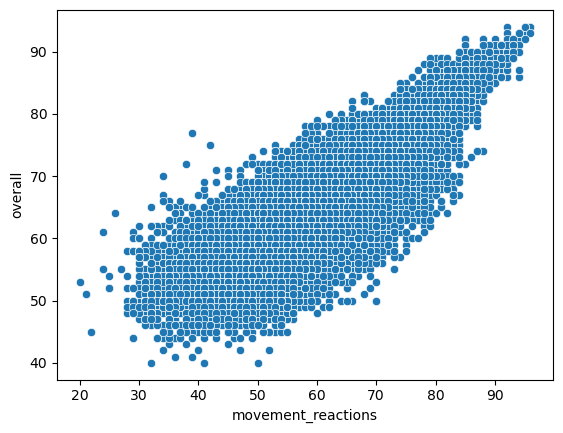

In [288]:
#showing a grapgh of overall against movement reactions
sns.scatterplot(x='movement_reactions', y='overall', data=relevant_data)

The plot highlights a direct and strong relationship between a player's movenemt reactions and their overall rating.

<Axes: xlabel='potential', ylabel='overall'>

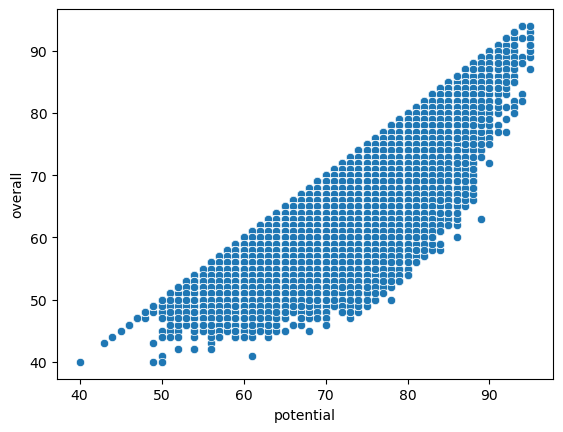

In [289]:
#showing a grapgh of overall against potential
sns.scatterplot(x='potential', y='overall', data=relevant_data)

The plot highlights a direct and strong relationship between a player's potential and their overall rating, demonstrating that potential is a significant predictor of a player’s overall performance.

<Axes: xlabel='skill_ball_control', ylabel='overall'>

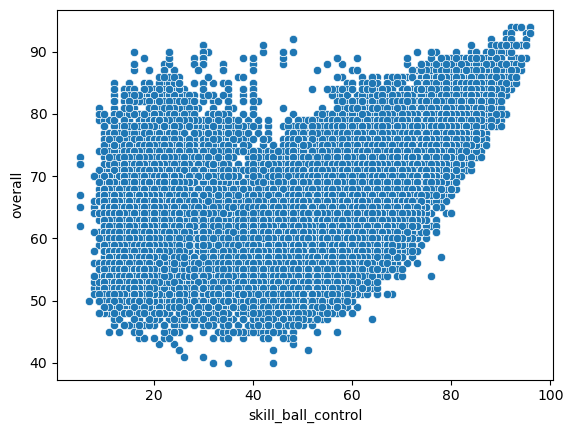

In [290]:
#showing a grapgh of overall against skill_ball_control
sns.scatterplot(x='skill_ball_control', y='overall', data=relevant_data)

There is a visible positive trend; as skill_ball_control increases, the overall rating tends to increase as well.
This suggests that players with better ball control generally have higher overall ratings

**Selecting the feature subset that have the strongest correlation**

In [292]:
main_21 = pd.DataFrame()
chosen_columns = ['overall', 'movement_reactions','potential','wage_eur','power_shot_power','value_eur','passing','mentality_vision', 
                   'international_reputation', 'skill_long_passing', 'physic', 'skill_ball_control' ]

for i in chosen_columns:
    main_21[i] = relevant_data[i]
main_21

,overall,movement_reactions,potential,wage_eur,power_shot_power,value_eur,passing,mentality_vision,international_reputation,skill_long_passing,physic,skill_ball_control
0,93.0,94.0,95.0,550000.0,80.0,100500000.0,86.0,90.0,5.0,76.0,63.0,96.0
1,92.0,90.0,92.0,375000.0,94.0,79000000.0,81.0,81.0,5.0,72.0,79.0,92.0
2,90.0,89.0,90.0,275000.0,86.0,54500000.0,83.0,84.0,5.0,76.0,64.0,90.0
3,90.0,85.0,90.0,275000.0,93.0,52500000.0,81.0,83.0,5.0,76.0,86.0,90.0
4,90.0,89.0,90.0,300000.0,42.0,63500000.0,58.0,20.0,5.0,41.0,66.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,46.0,39.0,61.0,700.0,64.0,110000.0,40.0,42.0,1.0,33.0,44.0,45.0
161579,46.0,42.0,58.0,750.0,33.0,110000.0,29.0,31.0,1.0,25.0,57.0,32.0
161580,46.0,50.0,58.0,500.0,51.0,110000.0,43.0,40.0,1.0,43.0,53.0,35.0
161581,46.0,45.0,70.0,500.0,42.0,150000.0,36.0,44.0,1.0,26.0,42.0,43.0


**Seperating the data into feature and labels**

In [293]:
y = main_21['overall']
X = main_21.drop('overall', axis = 1)

**Scaling the data**

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

jb.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## **Method to clean the FIFA 22 data**

In [296]:
#creating the function for my players 22
def clean_players_22(df):
    for i in df.columns:
        if 'url' in i:
            df.drop(i,axis=1, inplace = True)
        
    df.dropna(thresh= 0.3 * len(df), axis=1, inplace=True)
    
    remove_columns = ['player_positions', 'sofifa_id', 'short_name', 'long_name','club_team_id', 'club_name',
    'league_name','age', 'dob','club_contract_valid_until', 'nationality_id', 'nationality_name' , 'real_face','club_position',
    'club_jersey_number','club_joined','ls', 'st', 'rs',
    'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
    'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
    'rcb', 'rb', 'gk','player_traits']
    
    df = df.drop(columns=remove_columns)
    
    alpha_df2 = df.select_dtypes(exclude='number')
    numeric_df2 = df.select_dtypes(include='number')
    
    numeric_df2 = pd.DataFrame(impute.fit_transform(numeric_df2), columns= numeric_df2.columns)
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    # Create a copy of the DataFrame to avoid modifying the original data
    encoded_df2 = alpha_df2.copy()
    
    for col in alpha_df2.columns:
        encoded_df2[col] = label_encoder.fit_transform(alpha_df2[col])
    
    alpha_df2=encoded_df2
    
    relevant_data2 = pd.concat([alpha_df2,numeric_df2],axis=1)
    main_22 = pd.DataFrame()
    chosen_columns2 = ['overall', 'movement_reactions','potential','wage_eur','power_shot_power','value_eur','passing','mentality_vision', 
    'international_reputation', 'skill_long_passing', 'physic', 'skill_ball_control']
    
    for i in chosen_columns2:
        main_22[i] = relevant_data2[i]
        
    y_test2 = main_22['overall']
    X_test2 = main_22.drop('overall', axis = 1)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_test2 = scaler.fit_transform(X_test2)
    return X_test2, y_test2

## **3. Training the models**

**Splitting the data into training and testing**

In [297]:
Xtrain , Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Initializing the models**

In [298]:
linear_model = LinearRegression()
xgb_model = XGBRegressor(n_estimators=600, learning_rate=0.1, max_depth=10)
dtree = DecisionTreeRegressor(max_depth=100, min_samples_split=40, min_samples_leaf=40)
random_forest_model = RandomForestRegressor(n_estimators=500, max_depth=40, min_samples_split=10, min_samples_leaf=40)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=50)
AdaBoost = AdaBoostRegressor(n_estimators=500, learning_rate=0.1)

In [346]:
def train_model(model, X, Y, cv=2):
    # Perform cross-validation
    y_pred = cross_val_predict(model, X, Y, cv=cv)
    
    # Fit the model on the whole dataset
    model.fit(X, Y)
    
    # Calculate and print evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Absolute Error: {mean_absolute_error(Y, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(Y, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y, y_pred))}")
    print(f"R^2 Score: {r2_score(Y, y_pred)}")
    print()

**First training of the models with cross validation**

In [348]:
train_model(linear_model, Xtest, Ytest)

Model: LinearRegression
Mean Absolute Error: 2.0992716891835554
Mean Squared Error: 7.308595021240206
Root Mean Squared Error: 2.7034413293504644
R^2 Score: 0.8525408908501705



In [349]:
train_model(xgb_model, Xtest, Ytest)

Model: XGBRegressor
Mean Absolute Error: 1.0407347752470506
Mean Squared Error: 2.125853638620768
Root Mean Squared Error: 1.4580307399436983
R^2 Score: 0.9571085163669737



In [350]:
train_model(dtree, Xtest, Ytest)

Model: DecisionTreeRegressor
Mean Absolute Error: 1.4066356737964503
Mean Squared Error: 3.6440031148254532
Root Mean Squared Error: 1.9089272156961494
R^2 Score: 0.9264781464166852



In [351]:
train_model(random_forest_model, Xtest, Ytest)

Model: RandomForestRegressor
Mean Absolute Error: 1.0527081117596617
Mean Squared Error: 2.2461655339541613
Root Mean Squared Error: 1.4987212996265054
R^2 Score: 0.9546810888170232



In [352]:
#train_model(gradient_boosting_model)

In [353]:
train_model(AdaBoost, Xtest, Ytest)

Model: AdaBoostRegressor
Mean Absolute Error: 1.7262170597042144
Mean Squared Error: 4.843878704219307
Root Mean Squared Error: 2.200881347146935
R^2 Score: 0.9022693094256571



## **Creating an Ensemble model using the best four models**

In [306]:
# Creating the ensemble model with my best four models
ensemble_model = VotingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('dt', dtree),
        ('rf', random_forest_model),
        ('ada', AdaBoost)
    ]
)

In [308]:
# Train the ensemble model
ensemble_model.fit(Xtrain, Ytrain)

# Evaluate the ensemble on the test data
y_pred_ensemble = ensemble_model.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble, Ytest)}")
print()

Mean Absolute Error: 1.111112170751246
Mean Squared Error: 2.223848257500501
Root Mean Squared Error: 1.4912572740813375
R^2 Score: 0.950155478151998



## **4. Fine Tuning the components of the ensemble model**

**Performing a grid search with cross validation for XGBoost**

In [319]:
# XGBoost parameters
param_grid_xgb = {
    'n_estimators': [100, 300, 600],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
}

In [320]:
# Create and fit the grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_xgb.fit(Xtrain, Ytrain)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_

print(f"Best parameters for XGBoost: {best_params_xgb}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 600}


In [321]:
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_xgb, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_xgb, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_xgb, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_xgb, Ytest)}")
print()

Mean Absolute Error: 0.8624560658351935
Mean Squared Error: 1.5023150629238666
Root Mean Squared Error: 1.225689627484816
R^2 Score: 0.9688541733929595



**Performing a grid search with cross validation for decsion tree model**

In [314]:
# Decision Tree parameter
param_grid_dtree = {
    'max_depth': [200, 200],
    'min_samples_split': [20, 40],
    'min_samples_leaf': [20, 40]
}

In [315]:
# Create and fit the grid search
grid_search_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_dtree.fit(Xtrain, Ytrain)

# Best parameters
best_params_dtree = grid_search_dtree.best_params_
print(f"Best parameters for Decision Tree: {best_params_dtree}")



Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters for Decision Tree: {'max_depth': 200, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [316]:
best_dtree = grid_search_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_dtree, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_dtree, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_dtree, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_dtree, Ytest)}")
print()

Mean Absolute Error: 1.1146394213068143
Mean Squared Error: 2.6402158776828437
Root Mean Squared Error: 1.6248741113338114
R^2 Score: 0.9448078422481356



**Performing a grid search with cross validation for the Random Forest Model**

In [317]:
# Random Forest parameters
param_grid_rf = {
    'n_estimators': [500, 400],
    'max_depth': [20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [20, 40]
}

In [322]:
# Create and fit the grid search
grid_search_rf = GridSearchCV(estimator=random_forest_model,
                              param_grid=param_grid_rf,
                              cv= 2,
                              n_jobs=-1,
                              verbose=2,
                              scoring='neg_mean_squared_error')
grid_search_rf.fit(Xtrain, Ytrain)

# Best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 500}


In [323]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_rf, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_rf, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_rf, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_rf, Ytest)}")
print()

Mean Absolute Error: 1.0130051828044473
Mean Squared Error: 2.121744073557204
Root Mean Squared Error: 1.4566207720464528
R^2 Score: 0.9549157751267787



**Performing a grid search with cross validation for the ADA Boost regression Model**

In [324]:
# AdaBoost parameters
param_grid_ada = {
    'n_estimators': [500, 400],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [325]:
# Create and fit the grid search
grid_search_ada = GridSearchCV(estimator=AdaBoost, param_grid=param_grid_ada, cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_ada.fit(Xtrain, Ytrain)

# Best parameters
best_params_ada = grid_search_ada.best_params_
print(f"Best parameters for AdaBoost: {best_params_ada}")

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 400}


In [326]:
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ada, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ada, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ada, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ada, Ytest)}")
print()

Mean Absolute Error: 1.905257307380381
Mean Squared Error: 5.625632253557937
Root Mean Squared Error: 2.3718415321344586
R^2 Score: 0.855589418090656



**Combining all the best models from the grid search into an ensemble model using Voting Regressor**

In [327]:

# Creating the ensemble model
ensemble_model2 = VotingRegressor(
    estimators=[
        ('best_xgb', best_xgb),
        ('best_dtree', best_dtree),
        ('best_rf', best_rf),
        ('best_ada', best_ada )
    ]
)


In [328]:
# Train the ensemble model
ensemble_model2.fit(Xtrain, Ytrain)

# Evaluate the ensemble on the test data
y_pred_ensemble2 = ensemble_model2.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble2, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble2, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble2, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble2, Ytest)}")
print()

Mean Absolute Error: 1.0754991303955281
Mean Squared Error: 2.1140291471540023
Root Mean Squared Error: 1.453970132827357
R^2 Score: 0.9527291815999988



**Improving my previous random forest model and combining it with the voting regressor**

In [329]:
# Manually adjust hyperparameters for Random Forest and evaluating it
random_forest_model.set_params(n_estimators=400, max_depth=40, min_samples_split=2, min_samples_leaf=2)
random_forest_model.fit(Xtrain, Ytrain)


y_pred_ensemble3 = random_forest_model.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble3, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble3, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble3, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble3, Ytest)}")
print()


Mean Absolute Error: 0.8945476054698165
Mean Squared Error: 1.7465406193807522
Root Mean Squared Error: 1.3215674857459048
R^2 Score: 0.9633287900329401



In [330]:
# Creating the ensemble model
ensemble_model4 = VotingRegressor(
    estimators=[
        ('best_xgb', best_xgb),
        ('best_dtree', best_dtree),
        ('best_rf', best_rf),
        ('rf', random_forest_model)
    ]
)

ensemble_model4.fit(Xtrain, Ytrain)

# Evaluate the ensemble on the test data
y_pred_ensemble4 = ensemble_model4.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble4, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble4, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble4, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble4, Ytest)}")
print()

Mean Absolute Error: 0.9220777413955714
Mean Squared Error: 1.7862797616069963
Root Mean Squared Error: 1.3365177745196644
R^2 Score: 0.9623727792785662



**Improving my previous Gradient Booost model and combining it with the voting regressor**

In [331]:
# Manually adjust hyperparameters for Gradient Boosting and evaluate
gradient_boosting_model.set_params(n_estimators=400, learning_rate=0.02, max_depth=10)
gradient_boosting_model.fit(Xtrain, Ytrain)


y_pred_ensemble3 = gradient_boosting_model.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble3, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble3, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble3, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble3, Ytest)}")
print()


Mean Absolute Error: 0.9090756640851231
Mean Squared Error: 1.6446501219059328
Root Mean Squared Error: 1.282439129902832
R^2 Score: 0.9656507594702601



In [332]:
# Creating the ensemble model
ensemble_model5 = VotingRegressor(
    estimators=[
        ('best_xgb', best_xgb),
        ('best_dtree', best_dtree),
        ('best_rf', best_rf),
        ('rf', random_forest_model),
        ('gb', gradient_boosting_model)
    ]
)

ensemble_model5.fit(Xtrain, Ytrain)

# Evaluate the ensemble on the test data
y_pred_ensemble5 = ensemble_model5.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble5, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble5, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble5, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble5, Ytest)}")
print()

Mean Absolute Error: 0.9101635339327115
Mean Squared Error: 1.7265354650066018
Root Mean Squared Error: 1.3139769651735154
R^2 Score: 0.9636658078438889



In [356]:
# Using the best xgboost as the final due to space restiction during deployment, its high accuracy and low MAE
ensemble_model6 = VotingRegressor(
    estimators=[
        ('best_xgb', best_xgb),
    ]
)

ensemble_model6.fit(Xtrain, Ytrain)

# Evaluate the ensemble on the test data
y_pred_ensemble6 = ensemble_model6.predict(Xtest)
print(f"Mean Absolute Error: {mean_absolute_error(y_pred_ensemble6, Ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred_ensemble6, Ytest)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred_ensemble6, Ytest))}")
print(f"R^2 Score: {r2_score(y_pred_ensemble6, Ytest)}")
print()

Mean Absolute Error: 0.8624560658351935
Mean Squared Error: 1.5023150629238666
Root Mean Squared Error: 1.225689627484816
R^2 Score: 0.9688541733929595



## **5. Testing on the new Data**

In [334]:
players_22 = pd.read_csv("players_22.csv",low_memory=False)
Xtest2 , Ytest2 = clean_players_22(players_22)

In [354]:
y_pred = ensemble_model6.predict(Xtest2)
# Calculate and print evaluation metrics
print(f"Model: {type(ensemble_model6).__name__}")
print(f"Mean Absolute Error: {mean_absolute_error(y_pred, Ytest2)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_pred, Ytest2))}")
print(f"R^2 Score: {r2_score(y_pred, Ytest2)}")
print()

Model: VotingRegressor
Mean Absolute Error: 1.1570222078251289
Root Mean Squared Error: 1.5291664535446736
R^2 Score: 0.9393502176645776



In [336]:
jb.dump(ensemble_model6, 'main_final_model.pkl', compress = 9)

['main_final_model.pkl']

*******